In [1]:
import os
path = os.getcwd()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']    # 用以正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      # 用以正常显示负号

14-1 离差标准化：数据标准化到[0, 1]

In [3]:
filename = path + '/data/business_circle.xls'
standardizedfile = path + '/tmp/standardized.xls'

data = pd.read_excel(filename, index_col = u'基站编号')
data = (data - data.min()) / (data.max() - data.min())
data = data.reset_index()
data.to_excel(standardizedfile, index = u'基站编号')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 5 columns):
基站编号             431 non-null int64
工作日上班时间人均停留时间    431 non-null float64
凌晨人均停留时间         431 non-null float64
周末人均停留时间         431 non-null float64
日均人流量            431 non-null float64
dtypes: float64(4), int64(1)
memory usage: 16.9 KB


In [4]:
data.index = data[u'基站编号']
data = data.drop(columns = u'基站编号')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 36902 to 37787
Data columns (total 4 columns):
工作日上班时间人均停留时间    431 non-null float64
凌晨人均停留时间         431 non-null float64
周末人均停留时间         431 non-null float64
日均人流量            431 non-null float64
dtypes: float64(4)
memory usage: 16.8 KB


In [6]:
data.describe()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
count,431.000000,431.000000,431.000000,431.000000
mean,0.384321,0.305893,0.368177,0.376262
std,0.338349,0.365819,0.307911,0.282181
min,0.000000,0.000000,0.000000,0.000000
25%,0.119565,0.035455,0.117874,0.127112
50%,0.198068,0.074545,0.221880,0.324705
75%,0.791063,0.708182,0.652542,0.570068
max,1.000000,1.000000,1.000000,1.000000


In [7]:
data.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,0.103865,0.856364,0.850539,0.169153
36903,0.263285,1.000000,0.725732,0.118210
36904,0.144928,0.740000,0.644068,0.038909
36905,0.082126,0.992727,0.993837,0.020031
36906,0.374396,0.867273,0.987673,0.102217


14-2 谱系聚类

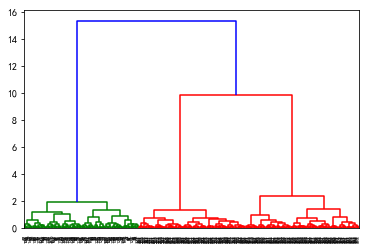

In [8]:
# 导入层次聚类函数
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, method = 'ward', metric = 'euclidean')  # 谱系聚类图
P = dendrogram(Z, 0)  # 绘制谱系聚类图
plt.show()

14-3 层次聚类算法

In [9]:
from sklearn.cluster import AgglomerativeClustering

# 层次聚类
k = 3
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(data)

# 详细输入原始数据及对应类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)
r.columns = list(data.columns) + [u'聚类类别']
r.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
36902,0.103865,0.856364,0.850539,0.169153,1
36903,0.263285,1.000000,0.725732,0.118210,1
36904,0.144928,0.740000,0.644068,0.038909,1
36905,0.082126,0.992727,0.993837,0.020031,1
36906,0.374396,0.867273,0.987673,0.102217,1


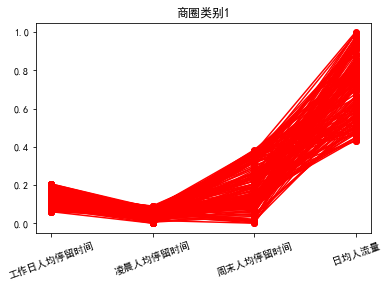

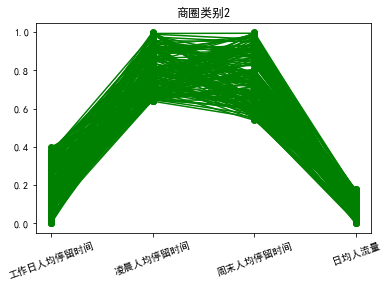

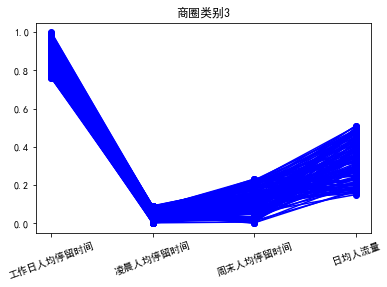

In [10]:
# 绘制聚类图，并且用不同样式进行画图
style = ['ro-', 'go-', 'bo-', 'y-', 'c-']
xlabels = [u'工作日人均停留时间',
           u'凌晨人均停留时间',
           u'周末人均停留时间',
           u'日均人流量']
pic_output = path + '/tmp/type_'

for i in range(k):
    plt.figure()
    tmp = r[r[u'聚类类别'] == i].iloc[:, :4]
    for j in range(len(tmp)):
        plt.plot(range(1, 5), tmp.iloc[j], style[i])

    plt.xticks(range(1, 5), xlabels, rotation = 20)  # 坐标标签
    plt.title(u'商圈类别%s' % (i + 1))
    plt.subplots_adjust(bottom = 0.15)  # 调整底部
    plt.savefig(u'%s%s.png' % (pic_output, i + 1))